## Imports

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

random_state=10

pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', 200)

-------
#### Reading in the clean train data

In [2]:
df_train = pd.read_csv("../datasets/train_clean.csv")

#### Dropping rows with outliers

In [3]:
df_train = df_train[df_train['Gr Liv Area'] <= 4000] #Removes 2 rows
df_train = df_train[df_train['Wood Deck SF'] <= 1000] #Removes 1 row
df_train = df_train[df_train['Mas Vnr Area'] <= 1400] #Removes 1 row
df_train = df_train.drop(df_train[(df_train['Overall Qual'] >= 9)&(df_train['SalePrice'] < 200000) ].index) #Removes 1 row
df_train = df_train.drop(df_train[(df_train['Overall Qual'] <= 6)&(df_train['SalePrice'] > 400000) ].index) #Removes 1 row

In [4]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,70.0,13517,Pave,None,2,Lvl,3,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,2,Lvl,3,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,3,Lvl,3,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,3,Lvl,3,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,2,Lvl,3,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,None,0,3,2010,WD,138500


In [5]:
df_train.dropna(inplace=True)

-----

## Fitting mutiple models

In [6]:
X = df_train.drop(columns=["SalePrice", "Id", "PID"])
y = df_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    remainder='passthrough'
)

----------
# Linear Regression

In [86]:
pipe = make_pipeline(

    ct,
    LinearRegression()
    
)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9352159128313563

In [87]:
pipe.score(X_test, y_test)

0.9139317087558679

In [88]:
mean_squared_error(y_test, pipe.predict(X_test), squared= False)

23218.504943171174

In [89]:
cross_val_score(pipe, X, y, cv=5).mean()

0.9093940124762506

----
# Lasso Regression

In [62]:
pipe = make_pipeline(

    ct,
    StandardScaler(),
    Lasso()
    
)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9352612678701413

In [63]:
pipe.score(X_test, y_test)

0.9139328553542274

In [64]:
mean_squared_error(y_test, pipe.predict(X_test), squared= False)

23218.350284655484

In [65]:
cross_val_score(pipe, X, y, cv=5).mean()

0.9096355276074345

-----
#### Finetuning the parameters

In [66]:
params = {
    'lasso__alpha' : [1, 10, 20, 30],
    'lasso__fit_intercept': [True,False],
    'lasso__max_iter' : [250, 500, 1000, 2000], 
    'lasso__normalize' : [True, False], 
    'lasso__positive' : [True, False]
}

In [67]:
gs = GridSearchCV(pipe,params, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

{'lasso__alpha': 10,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 250,
 'lasso__normalize': True,
 'lasso__positive': True}

In [68]:
gs.score(X_train, y_train)

0.9268258581552213

In [69]:
gs.score(X_test, y_test)

0.9190851650294521

In [70]:
mean_squared_error(y_test, gs.predict(X_test), squared= False)

22512.656127518923

In [71]:
cross_val_score(gs, X, y, cv=5).mean()

0.913603657889437

-----
# Ridge Regression

In [72]:
pipe = make_pipeline(

    ct,
    StandardScaler(),
    Ridge()
    
)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9352604075595708

In [73]:
pipe.score(X_test, y_test)

0.9139851139803079

In [74]:
mean_squared_error(y_test, pipe.predict(X_test), squared= False)

23211.30030449269

In [75]:
cross_val_score(pipe, X, y, cv=5).mean()

0.9098632114343449

-----
#### Finetuning the parameters

In [76]:
params = {
    'ridge__alpha' : [.001, .01, .1, 1, 10, 50],
    'ridge__fit_intercept': [True,False],
    'ridge__max_iter' : [250, 500, 1000, 2000], 
    'ridge__normalize' : [True, False], 
    'ridge__positive' : [True, False]
}

In [77]:
gs = GridSearchCV(pipe ,params, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

{'ridge__alpha': 0.1,
 'ridge__fit_intercept': True,
 'ridge__max_iter': 250,
 'ridge__normalize': True,
 'ridge__positive': True}

In [78]:
gs.score(X_train, y_train)

0.9286982328434805

In [79]:
gs.score(X_test, y_test)

0.9174141511667626

In [80]:
mean_squared_error(y_test, gs.predict(X_test), squared= False)

22743.928417318137

In [81]:
cross_val_score(gs, X, y, cv=5).mean()

0.9129362848486124

----------
# The Summary  

| Syntax        | Linear Regression | Lasso Regression | Ridge Regression | GS Lasso | GS Ridge |
| -----------   | ----------------- | ---------------- | ---------------- |----------|----------|
| r2 train      | 0.935             |   0.935          |  0.935           |   0.927  |  0.929   |
| r2 test       | 0.914             |  0.914           |  0.914           |   0.919  |  0.917   |
| Mean Crossval |     0.909         |       0.909      |     0.91         |   0.914  |   0.913  |
|  RMSE         |   23218           |    23218         |   23211          |   22512  |  22743   |

* The Linear Regression model performed the worst across all fields among all the models
* The grid searched Lasso and Ridge models performed the best. They had a lower RMSE and higher cross_val_score
--------------

### Using Boosted Algorithms

In [46]:
pipe = make_pipeline(

    ct,
    StandardScaler(),
    GradientBoostingRegressor()
    
)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.972447248976133

In [47]:
pipe.score(X_test, y_test)

0.9229257528314017

In [48]:
mean_squared_error(y_test, pipe.predict(X_test), squared= False)

22493.170936650575

In [25]:
cross_val_score(pipe, X, y, cv=5).mean()

0.9423540743504398

In [26]:
params = {
    'gradientboostingregressor__learning_rate': [.05, 0.1],
    'gradientboostingregressor__n_estimators': [1000, 2000],
    'gradientboostingregressor__max_depth': [3, 4, 5],
    'gradientboostingregressor__min_samples_leaf': [10, 15],
    'gradientboostingregressor__min_samples_split': [5, 10, 20]
}

In [27]:
gs = GridSearchCV(pipe ,params, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

{'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__learning_rate': 0.05,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__n_estimators': 1000}

In [28]:
gs.score(X_train, y_train)

0.9762195632424875

In [29]:
gs.score(X_test, y_test)

0.9436804679753588

In [30]:
mean_squared_error(y_test, gs.predict(X_test), squared= False)

19227.621161670588

## Predicted Price vs True Price

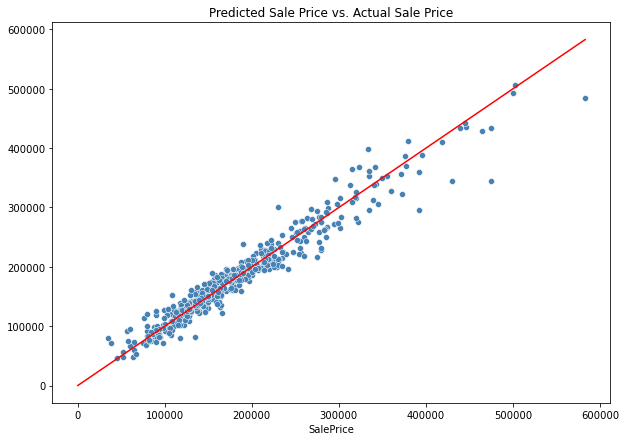

In [40]:
plt.figure(figsize=(10, 7))
plt.title("Predicted Sale Price vs. Actual Sale Price")
sns.scatterplot(y_test , gs.predict(X_test), color='steelblue')
plt.plot([0,y_test.max()], [0,y_test.max()], color = "r");

## Plotting the residuals

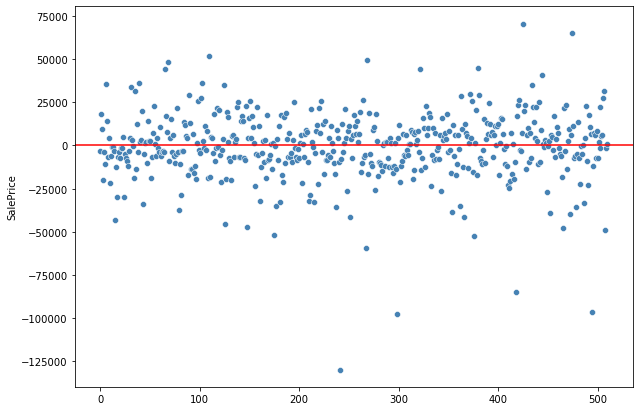

In [41]:
plt.figure(figsize=(10, 7))
resids = gs.predict(X_test) - y_test
sns.scatterplot(range(len(y_test)), resids, color='steelblue');

plt.axhline(0, color = "r");

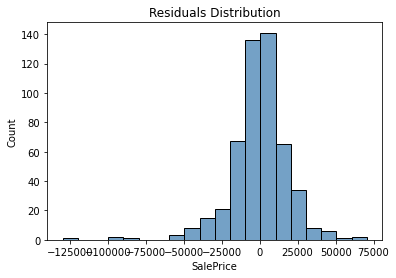

In [45]:
plt.title("Residuals Distribution")
sns.histplot(resids, color = "steelblue", bins=20);

-----
# Future Improvements

1) Look into feature engineering, like getting the house age, renovation age, or looking into the house condition / quality
2) Remove some features. The model was overfit so removing some features may help
3) See what is causing the model to underestimate the house price